In [1]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np

from shapely.geometry import Polygon, point
from geopandas import GeoSeries, GeoDataFrame, read_file
from pandas import DataFrame
import matplotlib.pyplot as plt
import geopandas as gpd

In [8]:
STACAntisocial117 = read_file('CrimeStatOutput/ST1_2017Antisocia1STAC.shp')
STACViolenceAndSex117 = read_file('CrimeStatOutput/ST1_2017ViolenceAndSex1CrimeCountSTAC.shp')
areas = read_file('data/Clipped.shp')

In [9]:
def findStacInArea(stac, area):
    value_geo = []
    for i, a in area.iterrows():
        for j, s in stac.iterrows():
            if a['geometry'].intersects(s['geometry']):
                value_geo.append(a['geometry'])
                found = 1
                stac = stac.drop([j])
                
    stac_lsoa = GeoDataFrame()
    stac_lsoa['geometry'] = GeoSeries(value_geo)
    
    return stac_lsoa

In [10]:
STACASlsoas=findStacInArea(STACAntisocial117, areas)

In [11]:
STACSVlsoas=findStacInArea(STACViolenceAndSex117, areas)

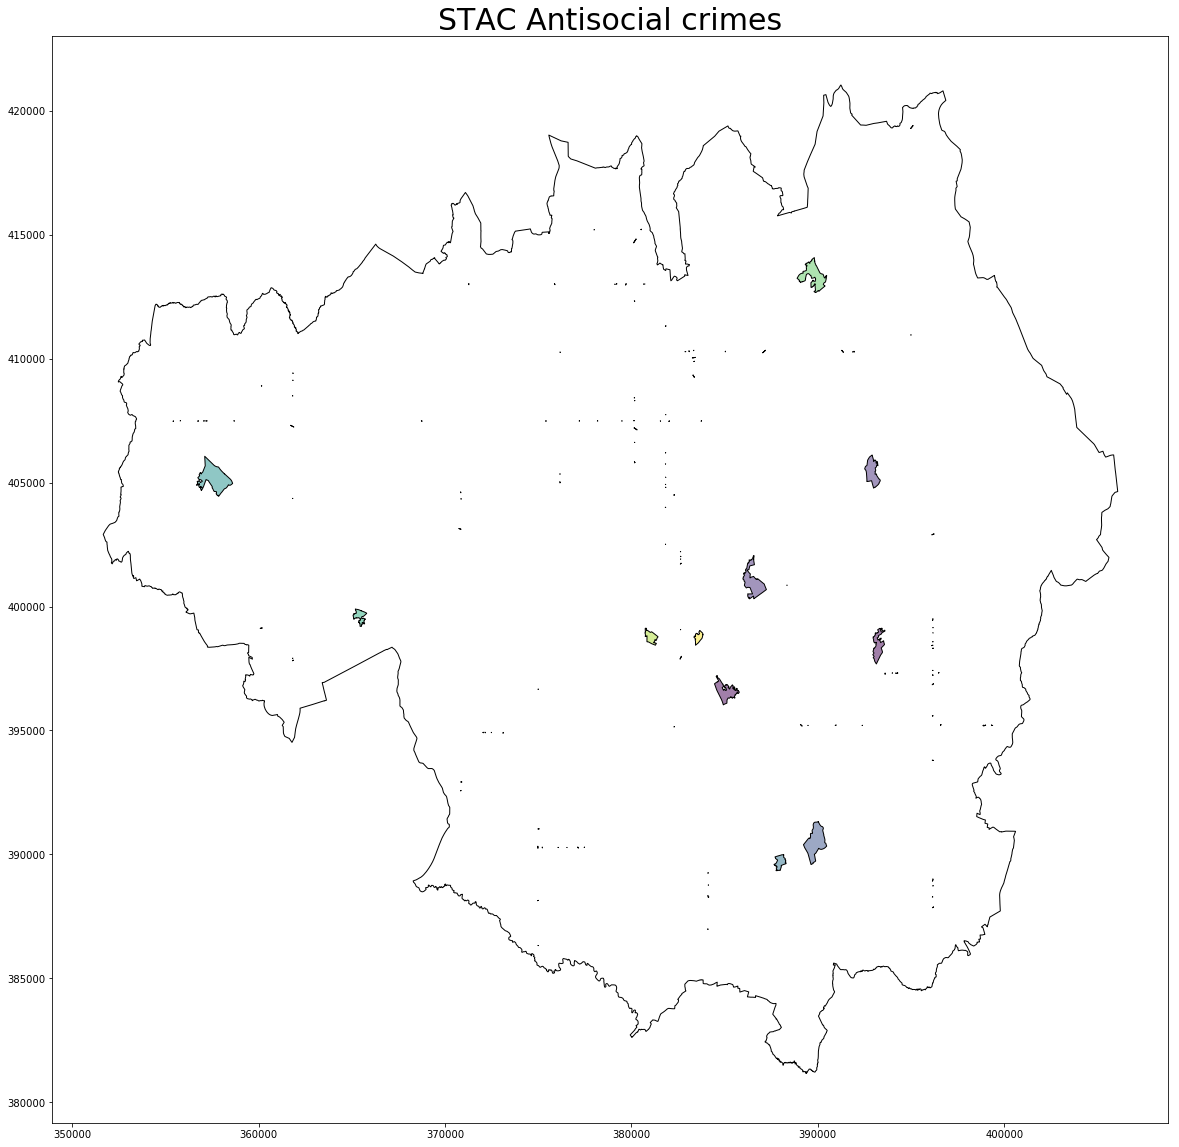

In [12]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax = STACASlsoas.plot(ax=disolved.plot(ax=ax, color="white"))
plt.title('STAC Antisocial crimes', size = 30)

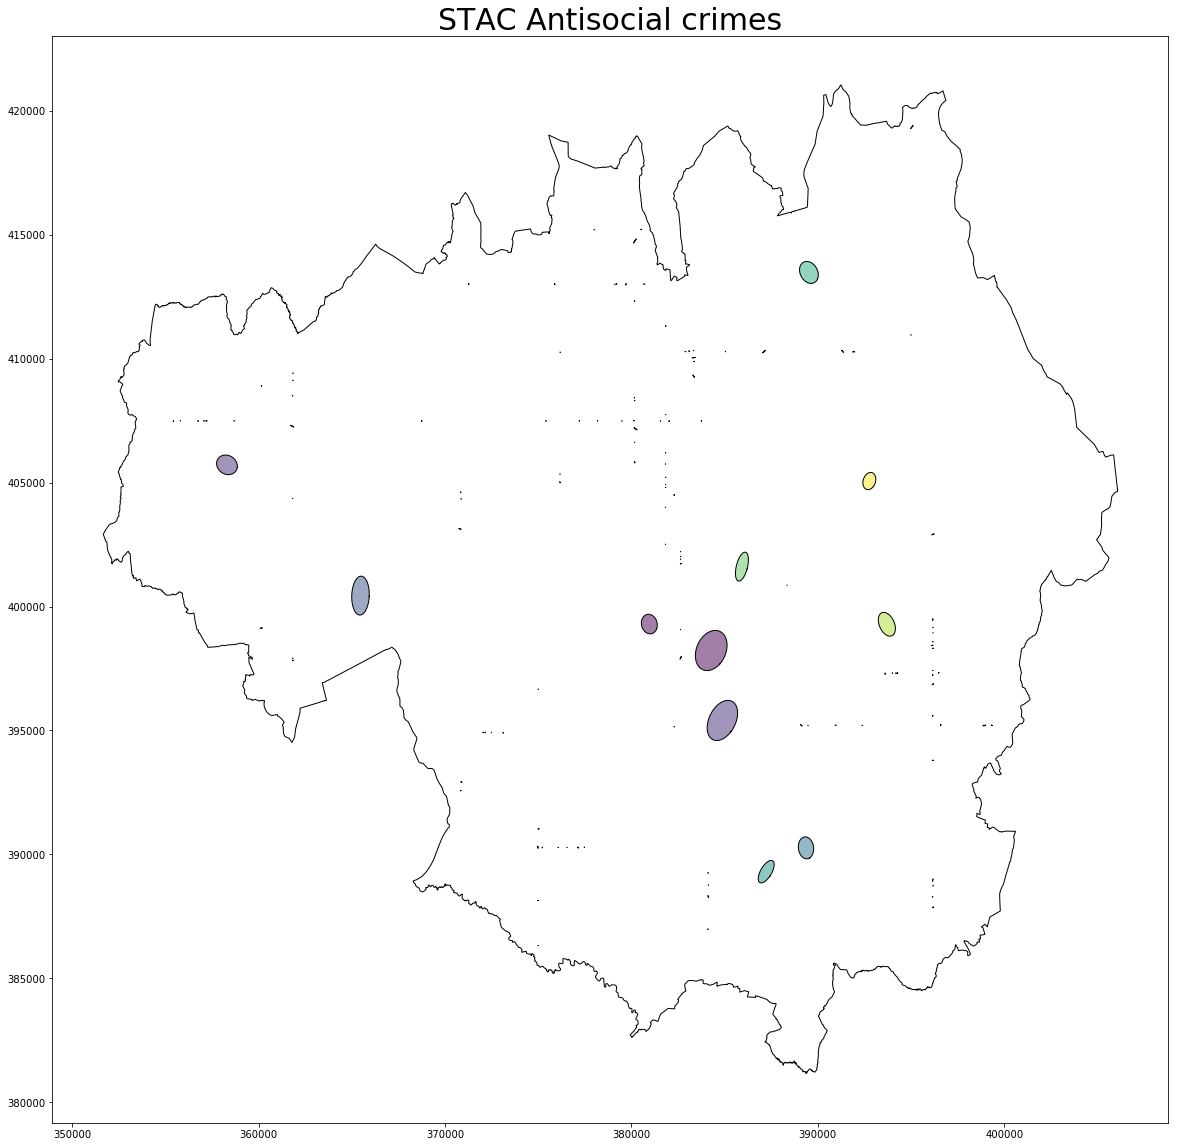

In [13]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax = STACAntisocial117.plot(ax=disolved.plot(ax=ax, color="white"))
plt.title('STAC Antisocial crimes', size = 30)

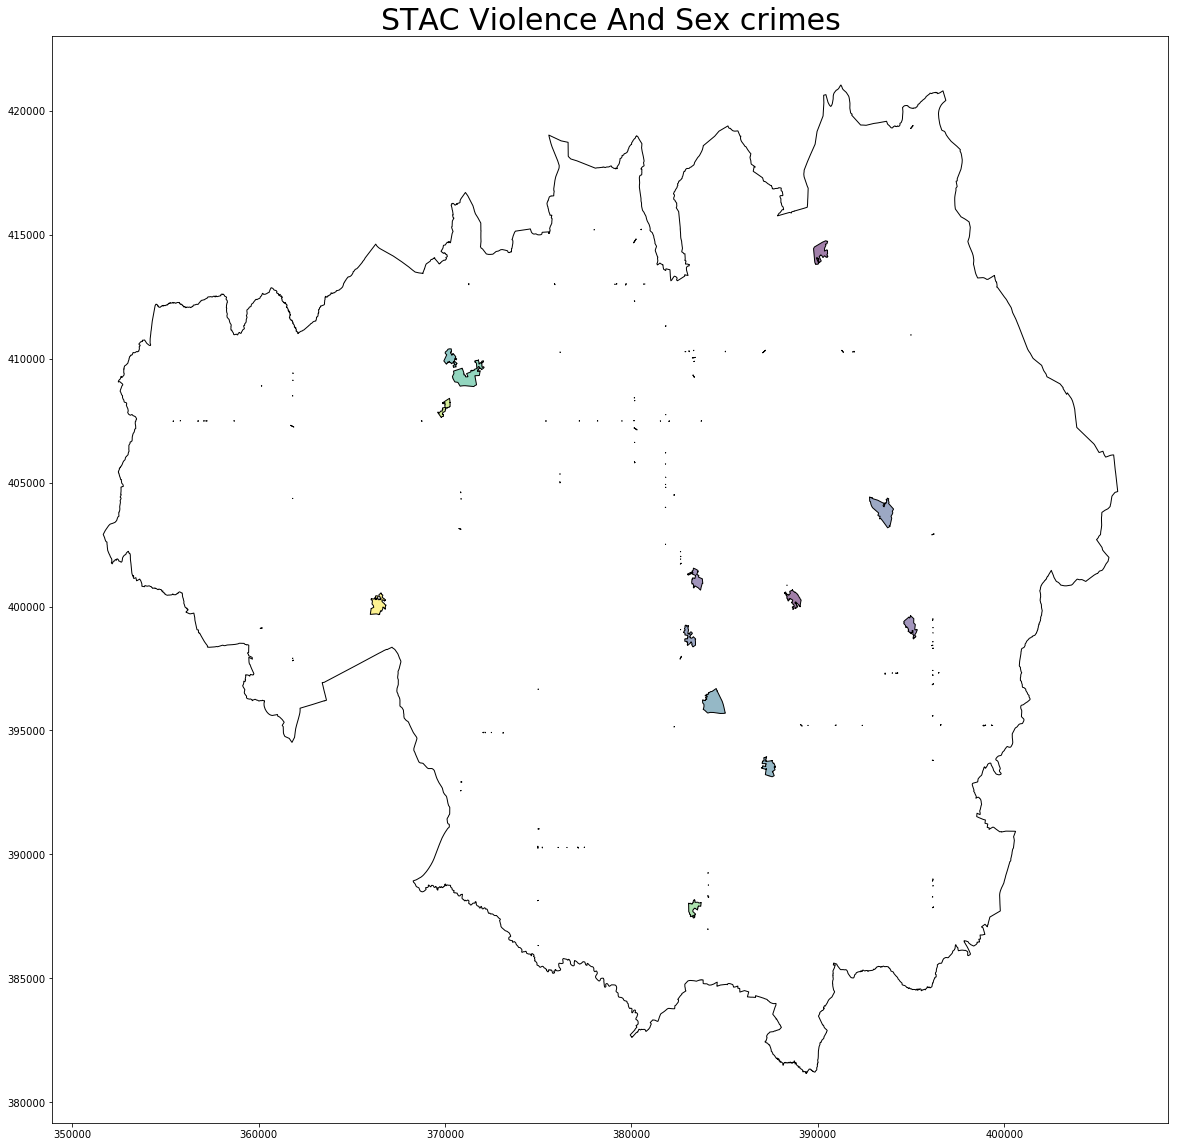

In [14]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax = STACSVlsoas.plot(ax=disolved.plot(ax=ax, color="white"))
plt.title('STAC Violence And Sex crimes', size = 30)

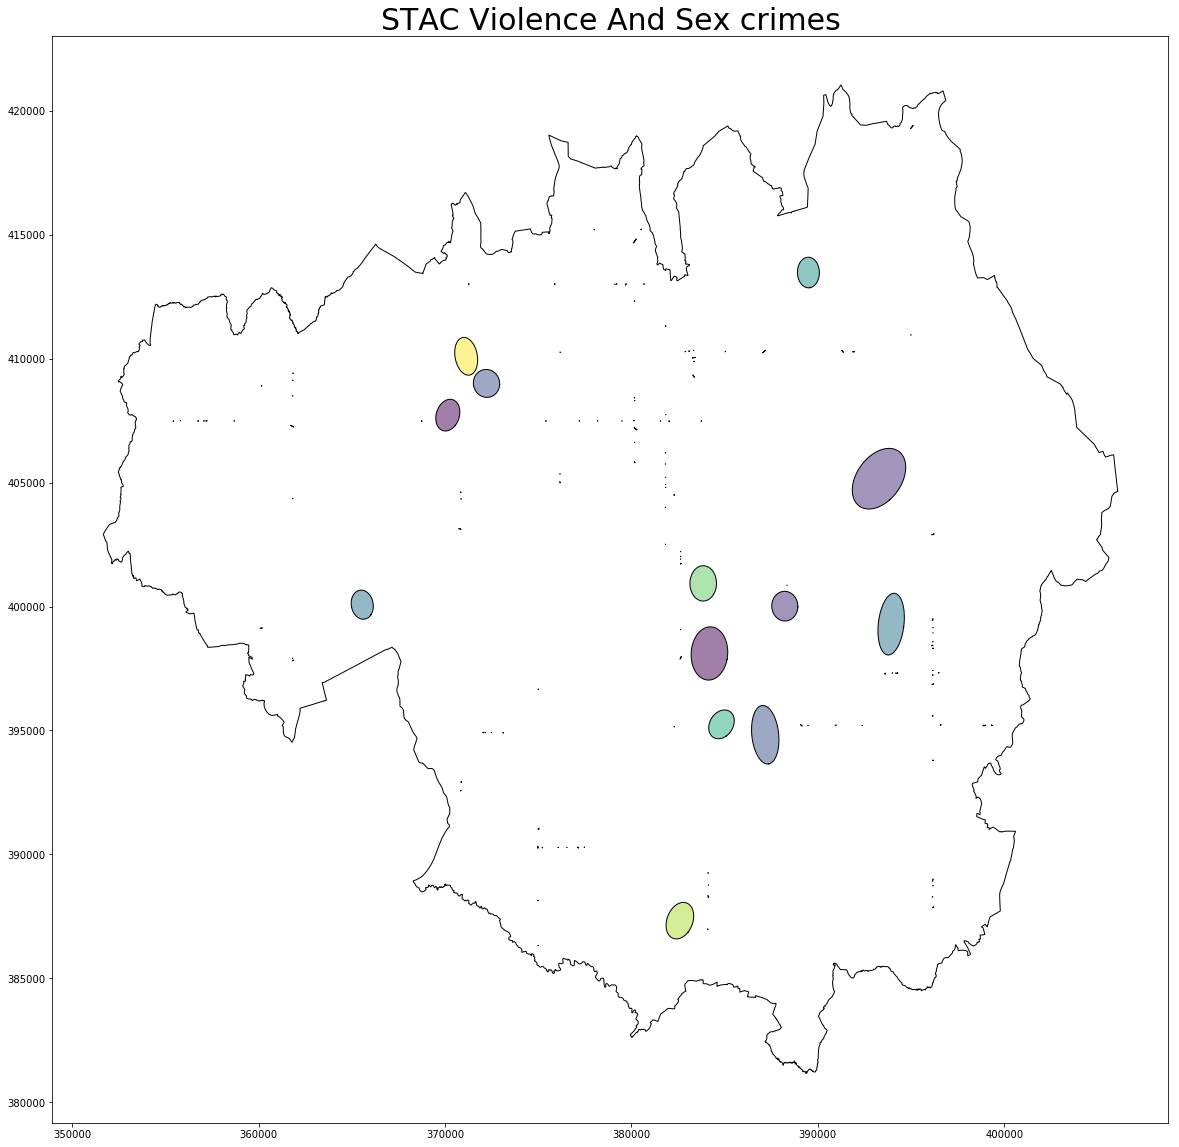

In [15]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax = STACViolenceAndSex117.plot(ax=disolved.plot(ax=ax, color="white"))
plt.title('STAC Violence And Sex crimes', size = 30)